In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 영화리뷰데이터 로드

In [2]:
import chardet

with open(r"C:\Users\User\Desktop\머신러닝 학습\나이브 베이즈 학습\imdb_master.csv","rb") as f:
    #인코딩을 자동으로 감지하는 라이브러리 인코딩을 자동으로 적어준다
    result = chardet.detect(f.read()) 

train = pd.read_csv(r"C:\Users\User\Desktop\머신러닝 학습\나이브 베이즈 학습\imdb_master.csv", encoding=result['encoding'])
train.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


###  데이터 변형

In [4]:
train = train.drop(train.columns[[0,1,4]], axis=1)

In [5]:
train

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
99995,"Delightfully awful! Made by David Giancola, a ...",unsup
99996,"Watching Time Chasers, it obvious that it was ...",unsup
99997,At the beginning we can see members of Troma t...,unsup
99998,"The movie was incredible, ever since I saw it ...",unsup


#### neg=0, pos=1로 label값 변경
- 로지스틱 회귀분석도 사용 가능하지만 나이브 베이즈 적용

In [8]:
train.label = [(l!='neg')*1 for l in train.label]

In [9]:
train.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [10]:
d = train
d.columns = ['user_review', 'positive']
d.head()

,user_review,positive
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


#### 트레이닝셋과 테스트셋으로 나눈다

In [11]:
split = 0.7
d_train = d[:int(split*len(d))]
d_test = d[int((1- split)*len(d)):]

#### 퓨처 추출하기

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(d_train.user_review)
features

#training 7만 건, features 12만 건

<70000x121229 sparse matrix of type '<class 'numpy.int64'>'
	with 9598445 stored elements in Compressed Sparse Row format>

In [13]:
# 단어들의 길이와 어떤 단어들이 있는지 확인
len(vectorizer.get_feature_names()), vectorizer.get_feature_names()

(121229,
 ['00',
  '000',
  '0000',
  '00000000000',
  '0000000000001',
  '000000003',
  '00000001',
  '00001',
  '0001',
  '00015',
  '000dm',
  '000s',
  '000â',
  '001',
  '002',
  '003',
  '003830',
  '004',
  '005',
  '006',
  '0069',
  '007',
  '0079',
  '007s',
  '007â',
  '008',
  '0080',
  '0083',
  '009',
  '0091042',
  '0093638',
  '00am',
  '00o',
  '00pm',
  '00s',
  '00schneider',
  '01',
  '0126',
  '0148',
  '019',
  '01pm',
  '02',
  '020410',
  '022',
  '0230',
  '0267',
  '029',
  '03',
  '0312',
  '039',
  '04',
  '041',
  '044',
  '05',
  '050',
  '05nomactr',
  '06',
  '0615',
  '06th',
  '07',
  '07am',
  '07b',
  '08',
  '087',
  '089',
  '08th',
  '09',
  '0and',
  '0f',
  '0ne',
  '0r',
  '0s',
  '0tt',
  '10',
  '100',
  '1000',
  '10000',
  '100000',
  '1000000',
  '10000000000',
  '10000000000000',
  '10000th',
  '1000lb',
  '1000s',
  '1000th',
  '1000x',
  '1001',
  '1003',
  '1004',
  '100b',
  '100bt',
  '100ft',
  '100ibs',
  '100k',
  '100m',
  '100mi

In [14]:
# 3만 건에서 100번 째 칸까지 확인하기
i = 30000
j = 100
words = vectorizer.get_feature_names()[i:i+30] #단어를 추출해준다
pd.DataFrame(features[j:j+10,i:i+30].todense(),columns=words)

#단어들이 많아서 대부분 0으로 표시된다

,dimanche,dimartino,dimas,dimbleby,dimbulb,dime,dimeco,dimension,dimensional,dimensionality,...,diminution,diminutive,dimitri,dimitriades,dimitrij,dimitrios,dimitrius,dimitrova,dimitru,dimitry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
words

['dimanche',
 'dimartino',
 'dimas',
 'dimbleby',
 'dimbulb',
 'dime',
 'dimeco',
 'dimension',
 'dimensional',
 'dimensionality',
 'dimensionally',
 'dimensionless',
 'dimensions',
 'dimentional',
 'dimes',
 'dimestore',
 'diminish',
 'diminished',
 'diminishes',
 'diminishing',
 'diminution',
 'diminutive',
 'dimitri',
 'dimitriades',
 'dimitrij',
 'dimitrios',
 'dimitrius',
 'dimitrova',
 'dimitru',
 'dimitry']

### 모델 제작

In [17]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB() #여러 개의 범주를 예측함
model1.fit(features, d_train.positive) #features, d_train.positive를 사용해 모델 훈련

MultinomialNB()

### 예측하기

In [18]:
# predict_proba 예측값과 확률값을 같이 출력
pred1 = model1.predict_proba(vectorizer.transform(d_test.user_review)) 
pred1, pred1.shape

#neg = 0, pos = 1
#두 개를 합하면 1

(array([[1.00000000e+00, 1.89777939e-11],
        [9.99999967e-01, 3.29460894e-08],
        [9.99885531e-01, 1.14468753e-04],
        ...,
        [1.00000000e+00, 4.71360351e-10],
        [7.08223976e-01, 2.91776024e-01],
        [1.44847203e-12, 1.00000000e+00]]),
 (70000, 2))

### 평가하기
- ROC값 구하기

In [20]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report, roc_curve
def performance(y_true, pred, color='g', ann=True):
    acc = accuracy_score(y_true, pred[:,1] > 0.5) #긍정일 확률을 체크함 
    auc = roc_auc_score(y_true, pred[:,1]) #곡선과 x축 사이의 면적이 넓을 수록 좋은 모델
    fpr, tpr, thr = roc_curve(y_true, pred[:,1]) #ROC커브 그리기
    plot(fpr, tpr, color, linewidth="3")
    xlabel("False positive rate")
    ylabel("True positive rate")
    if ann:
        annotate("Acc: %0.2f" % acc, (0.1,0.8), size=14)
        annotate("AUC: %0.2f" % auc, (0.1,0.7), size=14)

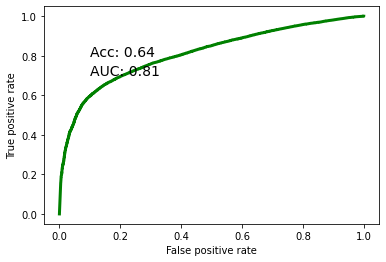

In [21]:
performance(d_test.positive, pred1)
#d_test.positive 실제값, pred1 예측값을 비교해서 모델을 평가함